---
# Day 2: Introduction to Machine Learning in Python
---

## 1. Introduction <a id='l_overview'></a>

The goal of today's lecture is to present unsupervised Machine Learning. We will learn about the most typical machine learning problems, such as dimensionality reduction, and how to approach these using the Python programmming language. These are the important concepts that we will cover:

- [Machine Learning](#l_ml)
- [Data sets](#l_ds)
- [Dimensionality reduction](#l_dr) 
- [Principal Component Analysis (PCA)](#l_pca)
- [Multidimensional Scaling (MDS)](#l_mds)
- [Other dimensionality reduction techniques](#l_other)


## 2. Machine Learning <a id='l_ml'></a>

Below is the outline of the field with specific algorithms:

1. **Unsupervised Learning** - there is no correct input/output pair 
    - *Clustering*
        - K-Means
        - Hierarchical
        - Spectral
    - *Dimensionality reduction*
        - Principal Components Analysis (PCA)
        - Multidimensional Scaling (MDS)
        - Stochastic Neighbour Embedding (t-SNE)
        - Uniform Manifold Approximation and Projection (UMAP)
        
        
2. **Supervised Learning** - there is a correct input/output pair
    - *Regression*
        - Curve fitting
        - Linear regression 
    - *Classification*
        - Linear Classifiers (Support Vector Machines, Logistic regression)
        - Decision Trees
        - Neural Networks
        
        
3. **Reinforcement Learning** - is an area concerned with how software agents have to take actions in an environment so as to maximize some cumulative reward



## 3. Generating data sets

Setup:
- Suppose one has $p$ samples of N-dimensional data points, $x_i\in\mathbb{R}^N$
- Store these samples columnwise as $X\in\mathbb{R}^{p\,\times\,N}$
- We call this the original data matrix, or simply the data
- Assumption: there is a meaningful metric (e.g. Euclidean distance) on the data space (high dim)
- Assumption: there is a meaningful metric (e.g. Euclidean distance) on the latent space (low dim)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# plt.style.use('seaborn-darkgrid')
# plt.style.use('seaborn-poster')

## 3.1 Generate linear data with noise (2-dimensional data set) with 100 points:

In [7]:
raw_data_x = np.random.uniform(0,10, size=(100,))
raw_data_y = 0.5 * raw_data_x + np.random.normal(0,1,len(raw_data_x))

X_2d = np.empty((100, 2))
X_2d[:,0] = raw_data_x
X_2d[:,1] = raw_data_y

Visualize

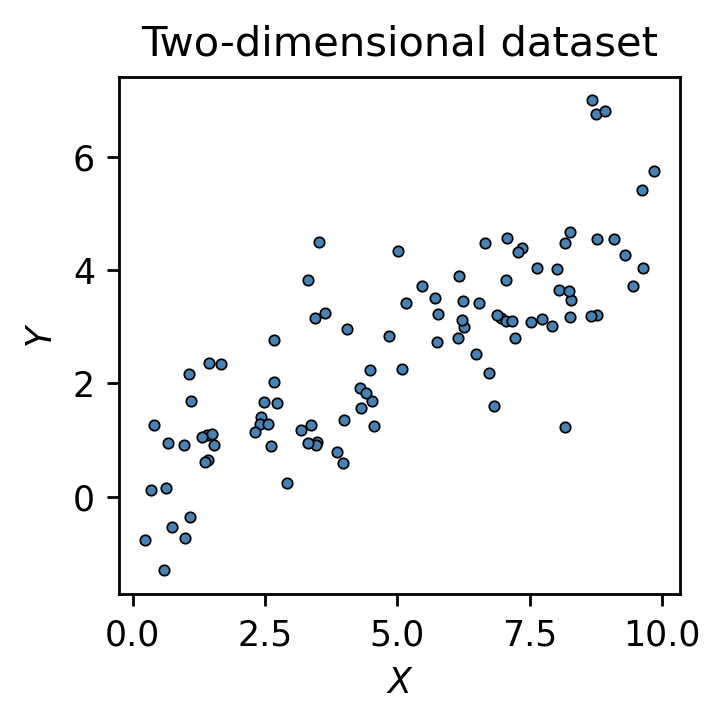

In [8]:
plt.figure(dpi=250, figsize=(3,3))
plt.scatter(X_2d[:,0], X_2d[:,1], marker='.', color='steelblue', edgecolor='k', lw=0.5)
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
plt.title('Two-dimensional dataset')
plt.tight_layout()
plt.show()

Let's look how the data looks like (first 10 points):

In [9]:
X_2d[:10]

array([[1.41557115, 1.09095104],
       [4.48721104, 2.24151005],
       [3.64187971, 3.24565998],
       [4.31557839, 1.56606099],
       [3.4932778 , 0.95828239],
       [9.6465829 , 4.02883538],
       [9.09372663, 4.55219503],
       [8.16421584, 4.48117252],
       [8.68402006, 6.99720919],
       [7.07232798, 4.55904537]])

## 3.2 Load high-dimensional data from the [MNIST](https://en.wikipedia.org/wiki/MNIST_database) dataset. 
![](pics/mnist.png)

Let's take only 1000 data points

In [10]:
import pandas as pd
df = pd.read_csv('data/mnist_test.csv')
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can now visualize what these data points represent (digital images)

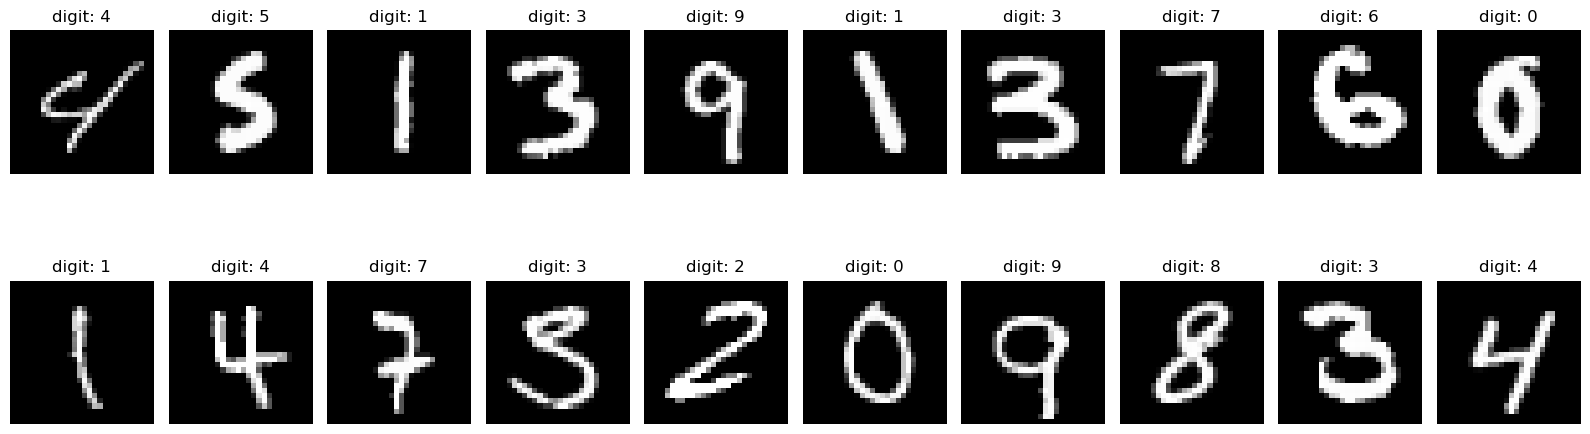

In [11]:
# Plot the first 20 digits
fig, axes = plt.subplots(2, 10, figsize=(16, 6))
for i, j in enumerate(np.random.choice(np.arange(1000), size=20)):
    image = np.array(df.iloc[j, 1:]).reshape(28,28)
    label = np.array(df.iloc[j, 0])
    axes[i//10, i%10].imshow(image, cmap='gray');
    axes[i//10, i%10].axis('off')
    axes[i//10, i%10].set_title(f"digit: {label}")
    
plt.tight_layout()

### We will only use the first 1000 digits

In [9]:
X = np.array(df.iloc[:1000, 1:]).reshape(-1, 28, 28)
Y = np.array(df.iloc[:1000, 0])
print(Y.shape, X.shape)

(1000,) (1000, 28, 28)


0


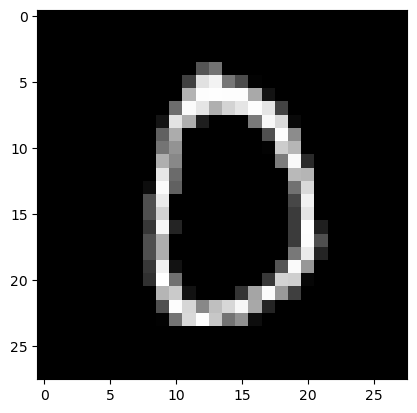

In [10]:
plt.imshow(X[567], cmap='gray')
print(Y[567])
plt.show()

We want to convert each data point (picture with a handwritten digit) back to a vector which dimensionality is 28x28 = 784. i.e. to make each 28x28 matrix a flat vector

In [11]:
X = X.reshape(1000, 784)
X[567].shape

(784,)

## Summary - we have two data sets:
- 2-dimensional data set with 100 points
- 784-dimensional data set with 1000 points

## 4. Dimensionality reduction <a id='l_dr'></a>

Dimensionality reduction is a technique used in machine learning and data analysis to reduce the number of input features or variables of a dataset while still retaining the important information. This is done by projecting the high-dimensional data onto a lower-dimensional space, while preserving the relevant characteristics of the original data.

The main goal of dimensionality reduction is to simplify the dataset and make it more manageable for analysis, visualization, and modeling. It also helps to reduce the risk of overfitting and improve the performance of machine learning models by removing irrelevant or redundant features.

There are two main types of dimensionality reduction:

- Feature selection: In this method, a subset of the original features is selected based on some criteria, such as correlation or importance.

- Feature extraction: In this method, a new set of features is created by transforming the original features into a lower-dimensional space using techniques such as principal component analysis (PCA), singular value decomposition (SVD), or t-distributed stochastic neighbor embedding (t-SNE).

Overall, dimensionality reduction is a powerful tool for reducing the complexity of large datasets while still preserving the essential information needed for effective analysis and modeling. You can select a subset of original variables, or find a linear or nonlinear combination of features, or make a projection to lower dimensions. 

![](pics/dr.png)


Methods:
- **Principal Components Analysis (PCA)** - linear method to extract dimensions with the highest variance
- **Multidimensional Scaling (MDS)** - nonlinear method to project in lower dimensions by saving pairwise distances
- **Stochastic Neighbour Embedding (t-SNE)** - making an embedding in lower dimensions by conserving distribution of distances 
- **Uniform Manifold Approximation and Projection (UMAP)** - projecting the data on manifold into fewer dimensions

## 5. Principal Component Analysis <a id='l_dr'></a>

### **Math**:

- **PCA goal**: Find orthogonal transformation $W$ of the centered data $X_c$ (i.e. $Y=WX_c$) such that variance along subsequent components is maximized (i.e. most variance along first, the second most variance is along the second, etc.); 
- Note that $X_c$ is $p \times N$, $W$ is $N \times N$, $Y$ is $p \times N$, principal components are the columns of $W$.
- Principal components of $X_c$ are typically found via eigendecomposition of covariance matrix $X_c^T X_c$ .
- The PCA embedding is $Y=U^T X_c$, where $U$ stores columnwise eigenvectors of $X_c^T X_c$ in decreasing order (by eigenvalue).

### Compute principle components via eigenvectors of covariance matrix

1. Center data set, i.e. first subtract the mean of the dataset from the dataset.
2. Compute the covariance matrix $X_c^T X_c$.
3. Compute eigenvectors of $X_c^T X_c$ and order them in terms of decreasing eigenvalues.
4. Transform the data using the eigenvectors stored columnwise in a matrix $U$ by $Y=U^T X_c$.
5. Compare our step-by-step method to the pythonic library PCA implementation

## Now we apply PCA method to 2d dataset:

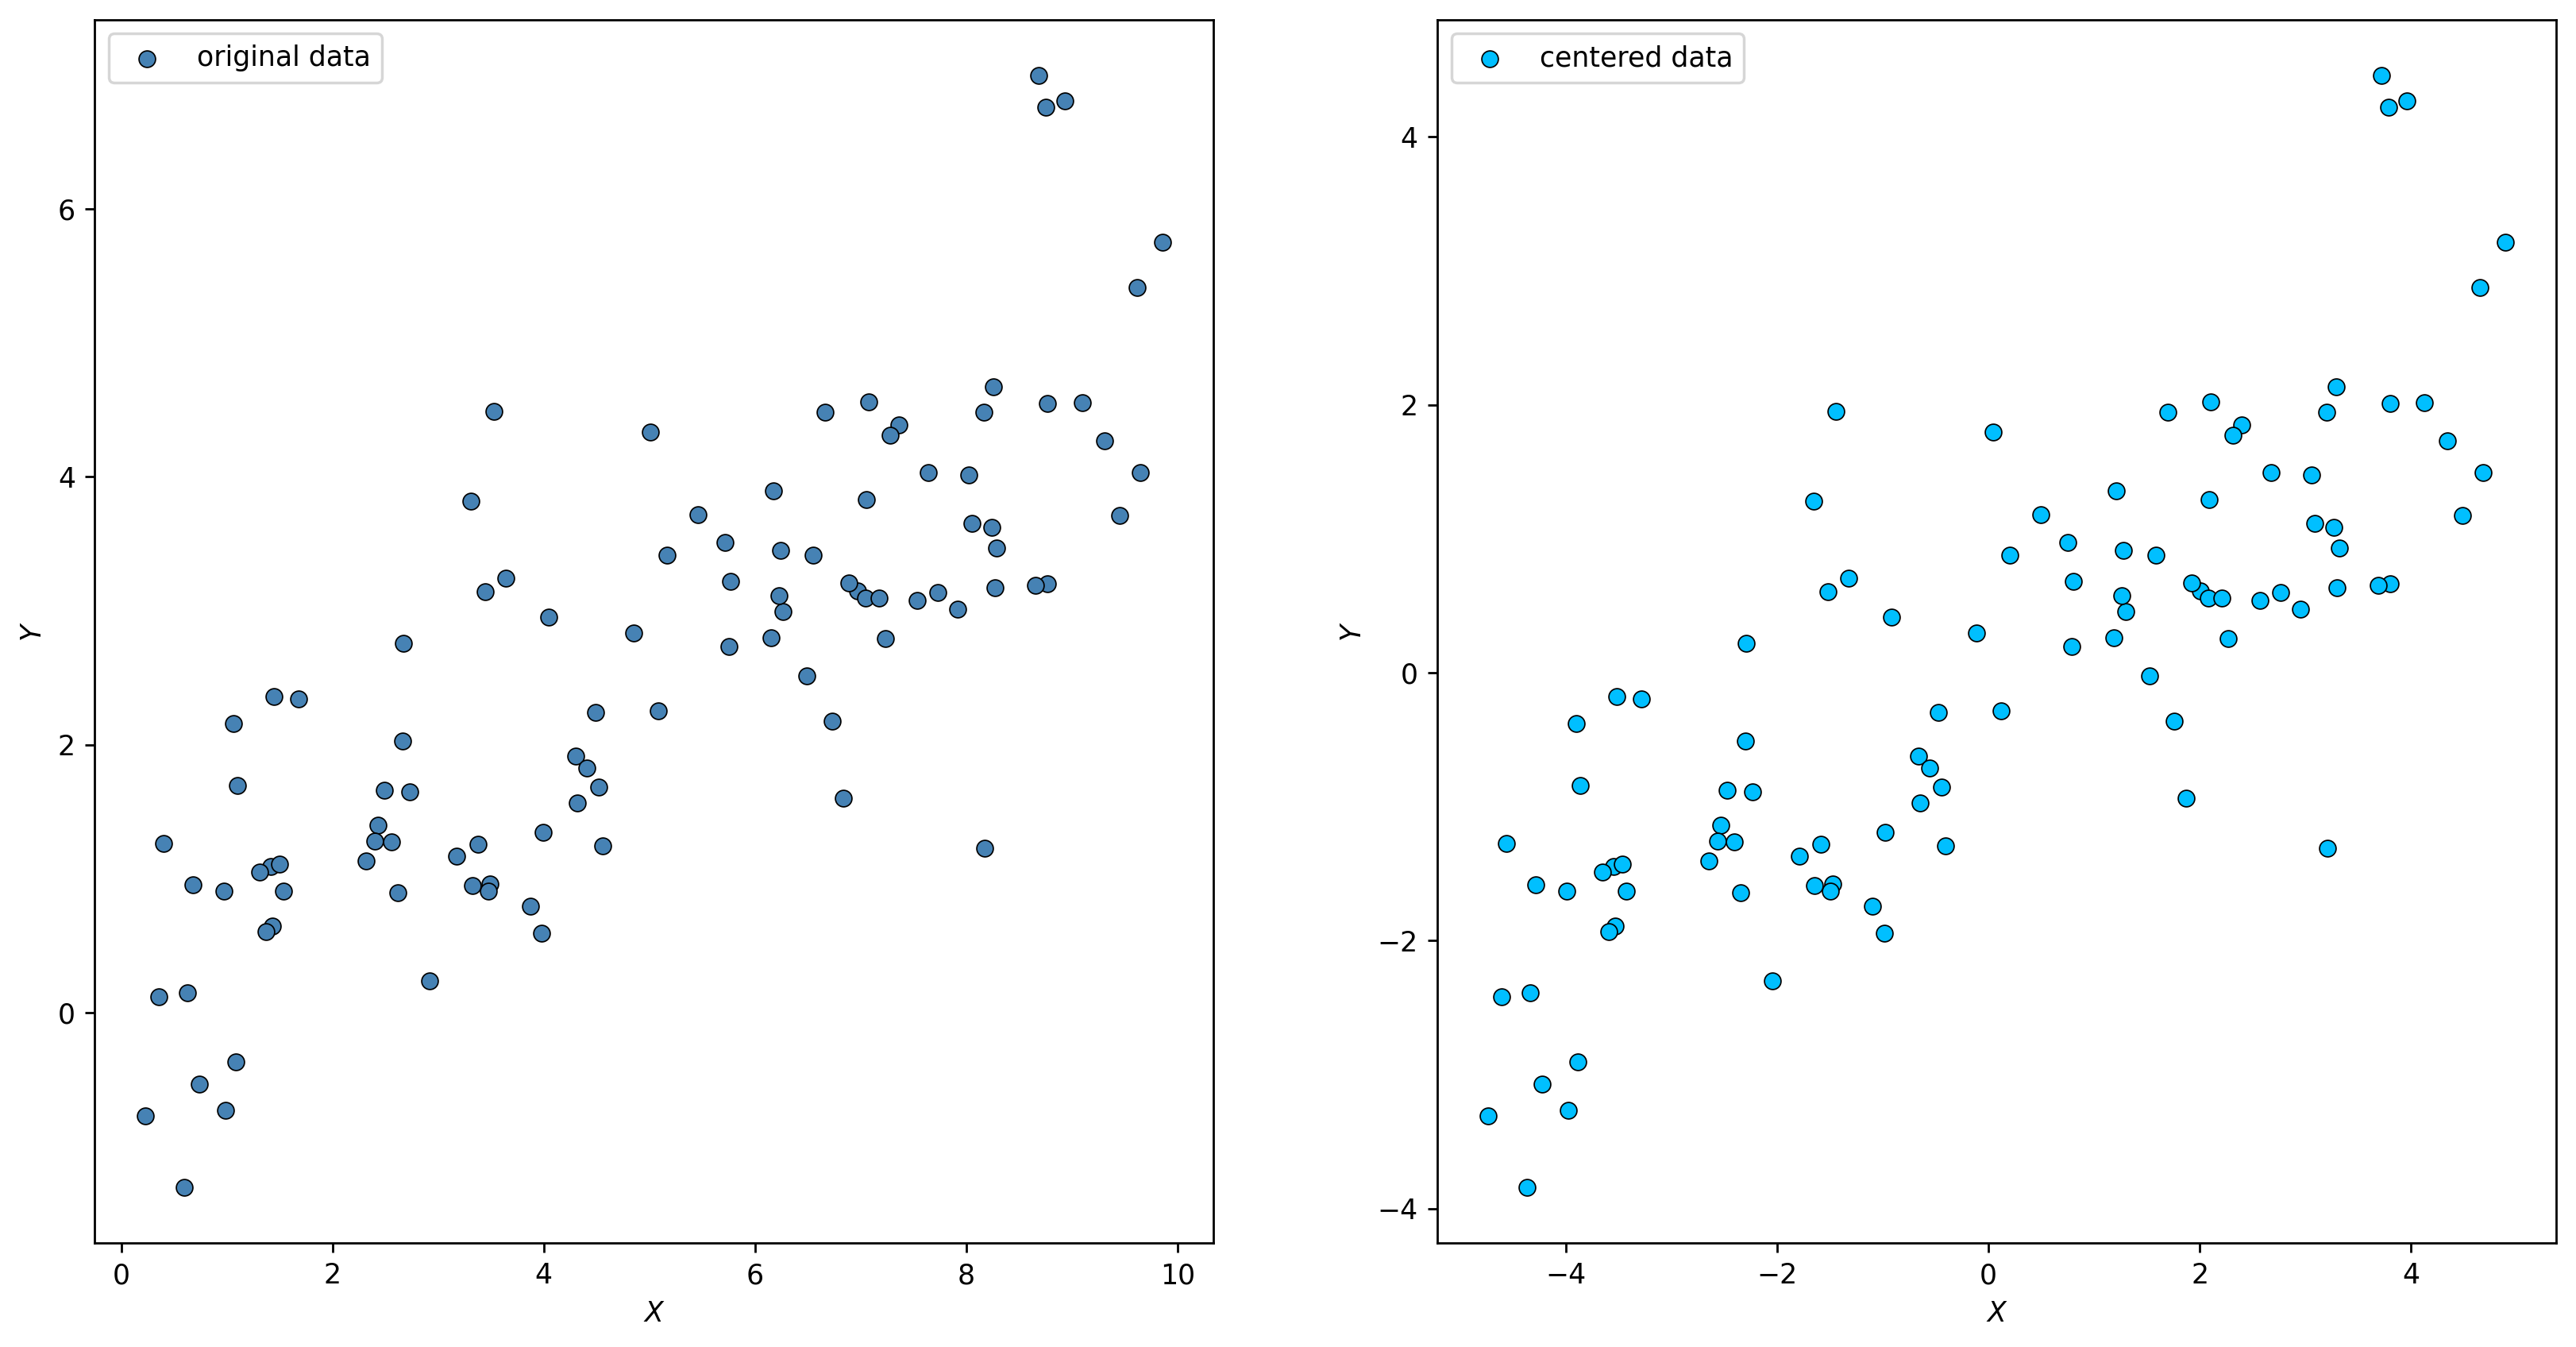

In [12]:
# Step 1

X_2d_centered = X_2d - np.mean(X_2d, axis=0)

# Visualize
fig, (a0, a1) = plt.subplots(1, 2, figsize=(16, 8), dpi=250)

a0.scatter(X_2d[:,0], X_2d[:,1], label='original data', color='steelblue', edgecolor='k', lw=0.5,)
a1.scatter(X_2d_centered[:,0], X_2d_centered[:,1], label='centered data', color='deepskyblue', edgecolor='k', lw=0.5,)
a0.legend()
a1.legend()

a0.set_xlabel(r'$X$')
a0.set_ylabel(r'$Y$')

a1.set_xlabel(r'$X$')
a1.set_ylabel(r'$Y$')

plt.show()

We see that the data is now centered on the origin.
Now compute the transformation:

In [13]:
# Step 2.
Cov = np.dot(np.transpose(X_2d_centered), X_2d_centered)
print("Covariance matrix:")
print(Cov)

Covariance matrix:
[[787.58308328 372.79326446]
 [372.79326446 275.21939021]]


In [14]:
#Step 3
eigvals, W = np.linalg.eig(Cov)
print("\nEigenvalues:")
print(eigvals)
print("\nEigenvectors (columns)")
print(W)

print("\nCheck that eigenvectors are orthogonal by computing their inner product (<w1,w2>=0):")
print(np.dot(W[:,0],W[:,1]))

print('\nVariance in the first principal component: {}'.format(eigvals[0]/np.sum(eigvals)))
print('Variance in the second principal component: {}'.format(eigvals[1]/np.sum(eigvals)))


Eigenvalues:
[983.73292535  79.06954813]

Eigenvectors (columns)
[[ 0.88497412 -0.46564021]
 [ 0.46564021  0.88497412]]

Check that eigenvectors are orthogonal by computing their inner product (<w1,w2>=0):
0.0

Variance in the first principal component: 0.9256027812267217
Variance in the second principal component: 0.07439721877327826


Let's plot the eigenvectors in comparison to the data

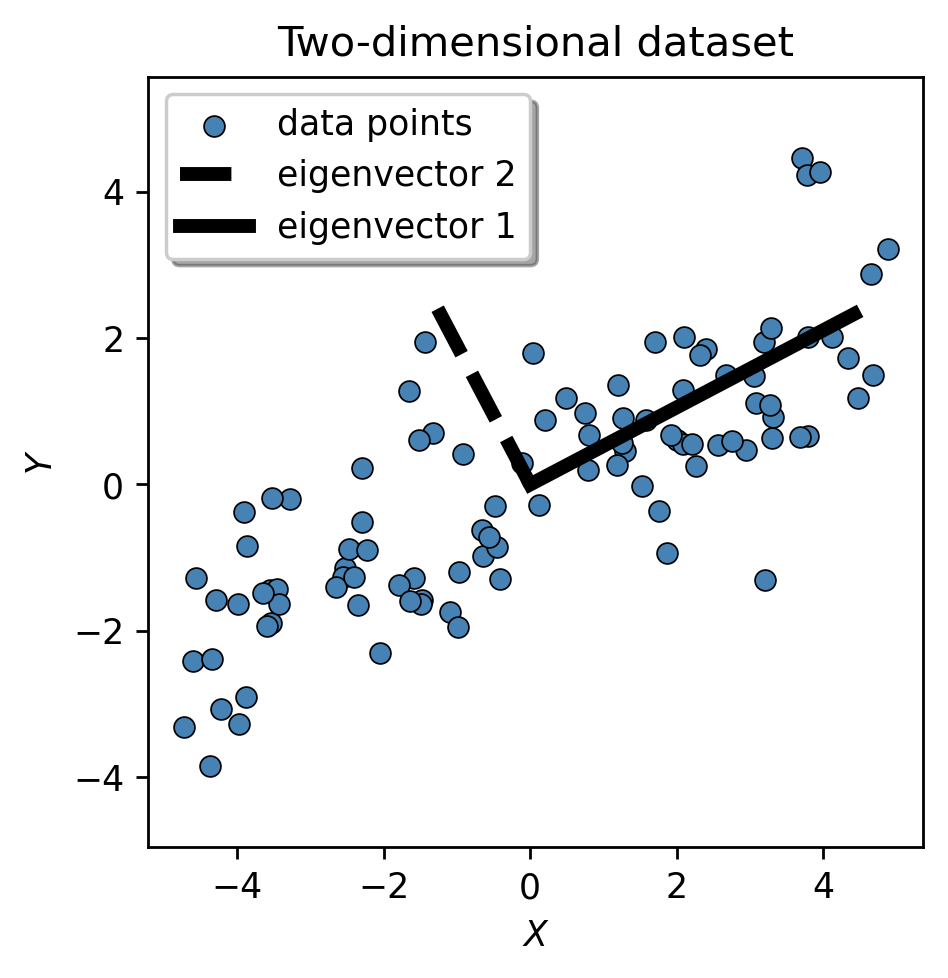

In [15]:
plt.figure(dpi=250, figsize=(4,4))

plt.scatter(X_2d_centered[:,0], X_2d_centered[:,1], color='steelblue', edgecolor='k', lw=0.5, label='data points')
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
plt.title('Two-dimensional dataset')

plt.plot([0, W[0][1]*3],[0, W[1][1]*3],'k',lw=4, label='eigenvector 2', ls='--')
plt.plot([0, W[0][0]*5],[0, W[1][0]*5],'k',lw=4, label='eigenvector 1')
plt.axis('equal')
plt.legend(fancybox=True, shadow=True)
plt.show()

Now we will apply the transformation to the data and plot the data in the new space. We flip the matrix W and corresponding eigenvalues so that they are ordered the same way as in the theory.

In [16]:
#Step 4

#eigvals = eigvals[::-1]
#print(eigvals)

# Applying transformation
X_2d_transformed = np.dot(X_2d_centered, W)

Visualize:

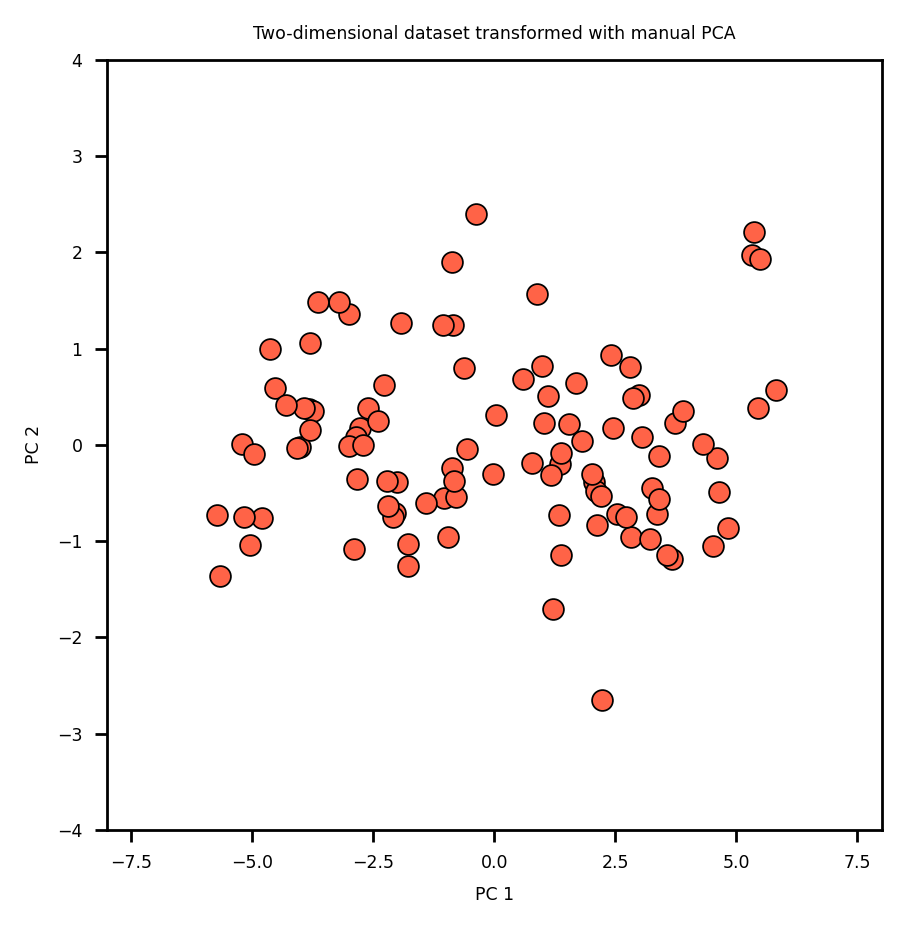

In [17]:
plt.figure(dpi=250, figsize=(4,4))
plt.scatter(X_2d_transformed[:,0], X_2d_transformed[:,1], color='tomato', edgecolor='k', lw=0.5, label='data points')
plt.title('Two-dimensional dataset transformed with manual PCA', fontsize=5)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.xlabel('PC 1', fontsize=5)
plt.ylabel('PC 2', fontsize=5)
plt.xlim(-8, 8)
plt.ylim(-4, 4)
plt.show()

Let's compare our naive implementation to the PCA implementation from sklearn

In [18]:
from sklearn.decomposition import PCA 

skl_PCA = PCA(n_components = 2).fit(X_2d) # fit the data to receive eigenvectors of covariance matrix
skl_X_2d_transformed = skl_PCA.transform(X_2d) # apply a transformation

Visualize and compare:

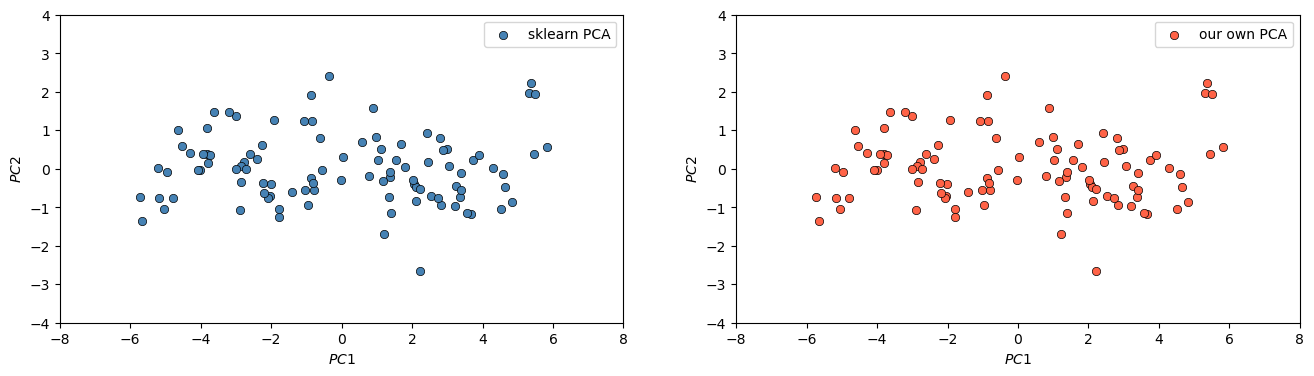

In [19]:
# Visualize
fig, (a0, a1) = plt.subplots(1, 2, figsize=(16, 4))

a0.scatter(skl_X_2d_transformed[:,0], skl_X_2d_transformed[:,1], label='sklearn PCA', color='steelblue', edgecolor='k',lw=0.5)
a1.scatter(X_2d_transformed[:,0], X_2d_transformed[:,1], label='our own PCA', color='tomato', edgecolor='k',lw=0.5)
a0.legend()
a1.legend()

a0.set_xlabel(r'$PC 1$')
a0.set_ylabel(r'$PC 2$')

a1.set_xlabel(r'$PC 1$')
a1.set_ylabel(r'$PC 2$')

a0.set_xlim(-8, 8)
a0.set_ylim(-4, 4)

a1.set_xlim(-8, 8)
a1.set_ylim(-4, 4)

plt.show()

Looks (almost) identical, up to 180 degree rotation! 

We will now truncate the data to one dimension and see how it looks. It's called a simple PCA dimensionality reduction.

In [20]:
print(skl_PCA.explained_variance_ratio_)

[0.92560278 0.07439722]


We notice that >90% of variance is in the first principal component

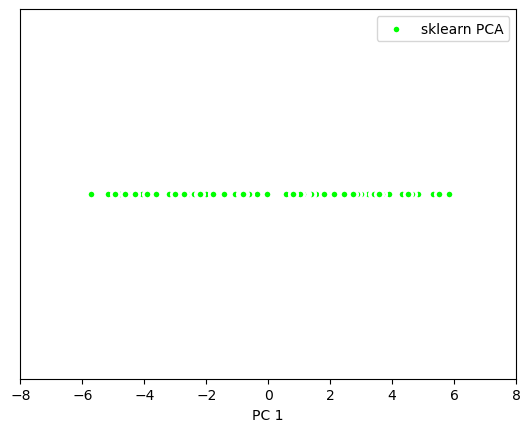

In [21]:
plt.scatter(skl_X_2d_transformed[:,0] , np.zeros(shape=skl_X_2d_transformed[:,0].shape), label='sklearn PCA', color='lime', edgecolor='w', lw=2, marker='o')
plt.ylim((-6,6))
plt.xlim((-8,8))
plt.legend()
plt.yticks([])
plt.xlabel('PC 1')

plt.show()

## Exercise 5.1

Perform principal component analysis on the 1000 points of 784-dimensional MNIST dataset using `sklearn`.
The dataset is already in the memory of the Jupyter Notebook under variable `X`. `Y` contains the label of each handwritten digit, i.e. the number, or the class. [Documentation on sklearn PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) 

784-dimensional dataset has 784 principal components (PC). 

1. Plot the percent variance contained in each PC vs PC number. **Hint**: variable `explained_variance_ratio_` may be useful.
2. Now plot cumulative percent variance vs number of PC components used. Decide how many PC you need to capture 90% of total variance.
2. Use the first two principal components to represent MNIST data set in two dimensions on a scatter plot. Each mnist digit will now be represented as a point. 
3. Show the image of first two principal eigenvectors, rescaled as 28x28. **Hint**: variable `components_` and function `reshape()` might be useful.


## 6. Multidimensional Scaling (MDS) <a id='l_mds'></a>

#### Metric MDS
Setup:
- Suppose one has $p$ samples of N-dimensional data points, $x_i\in\mathbb{R}^N$
- Store these samples rowwise as $X\in\mathbb{R}^{p\,\times\,N}$
- We call this the original data matrix, or simply the data
- Assumption: there is a meaningful metric (e.g. Euclidean distance) on the data space (high dim)
- Assumption: there is a meaningful metric (e.g. Euclidean distance) on the latent space (low dim)

Goal:
- Given N-dim data $X$, a metric $d(\cdot,\cdot)$ on $\mathbb{R}^N$, a target dimension $k<N$, and a metric $g(\cdot,\cdot)$ on $\mathbb{R}^k$
- Find an embedding $Y\in\mathbb{R}^{k\,\times\,p}$ (i.e. a $y_i\in\mathbb{R}^k$ for each $x_i\in\mathbb{R}^N$) such that distances $d_{ij}$, $g_{ij}$ are preserved between representations

Objective function: $$Y^\ast=\operatorname*{arg\,min}_Y {\sum_{i<j}{\left|d_{ij}\left(X\right)-g_{ij}\left(Y\right)\right|}}$$

Let's not invent the wheel and use MDS implementation in Python:

In [22]:
from sklearn.manifold import MDS
from scipy.spatial.distance import pdist, squareform
# compute MDS embedding (2D)
# Docs: http://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html

### By knowing the pairwise distances between points, can we guess their coordinates (without knowing them explicitly )?

In [23]:
## First, we should find pairwise distances between points in our 2D dataset:

D_compressed = pdist(X_2d, metric='euclidean') # n*(n-1)/2 size
D = squareform(D_compressed)

In [24]:
D.shape

(100, 100)

The pairwise distance matrix looks something like this: 

![](https://www.displayr.com/wp-content/uploads/2018/04/Distance-Matrix.png)

Let's run the MDS algorithm on the pairwise distance matrix D:

In [25]:
mds_2d = MDS(n_components=2, dissimilarity='precomputed', n_jobs=-1 ).fit_transform(D) 
# it contains the embedding of original 2D data back on 2D

### Now let's see the output of the algorithm.

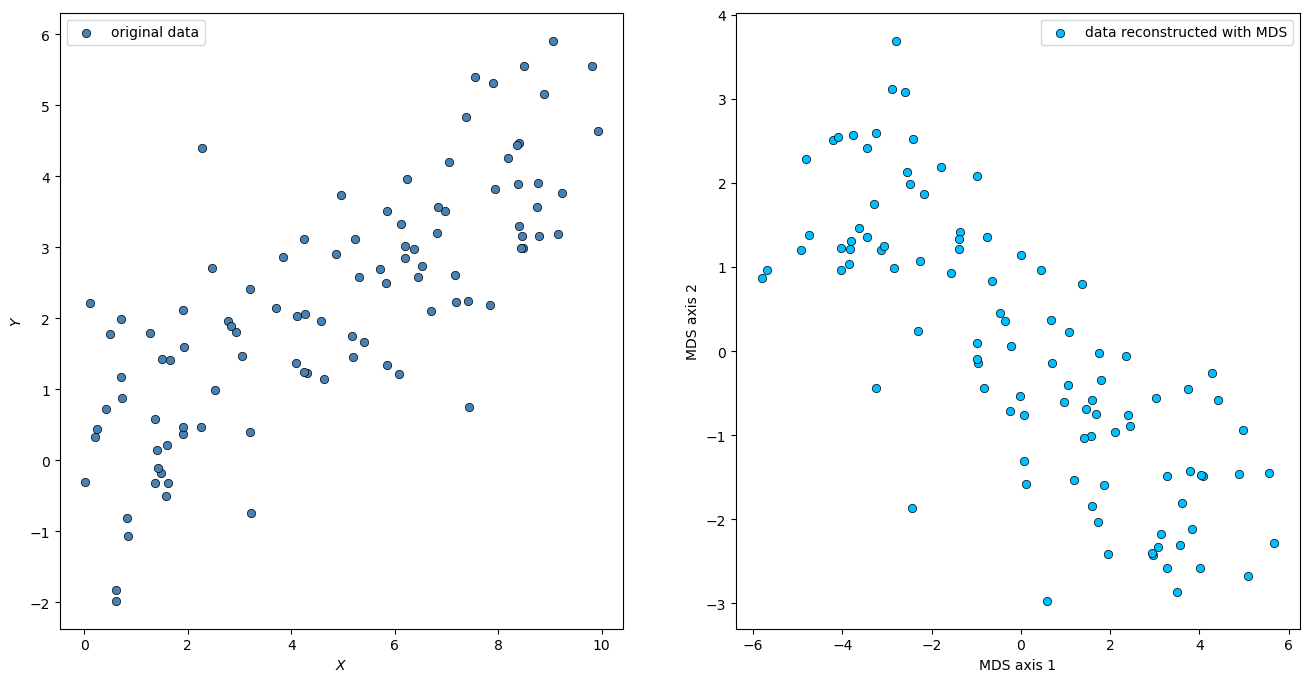

In [32]:

fig, (a0, a1) = plt.subplots(1, 2, figsize=(16, 8))

a0.scatter(X_2d[:,0], X_2d[:,1], label='original data', color='steelblue', edgecolor='k', lw=0.5)
a0.set_xlabel(r'$X$')
a0.set_ylabel(r'$Y$')

a1.scatter(mds_2d[:,0], mds_2d[:,1], label='data reconstructed with MDS', color='deepskyblue', edgecolor='k', lw=0.5)
a1.set_xlabel('MDS axis 1')
a1.set_ylabel('MDS axis 2')

a0.legend()
a1.legend()

plt.show()

### Restores original coordinates up to a (i) translation, (ii) rotation and (iii) reflection.

What about high dimensional data?

In [27]:
mds_X = MDS(n_components=2, dissimilarity='euclidean', n_jobs=4).fit_transform(X) ## distances will be computed

This is what we get as an output of the algorithm

In [28]:
mds_X.shape

(1000, 2)

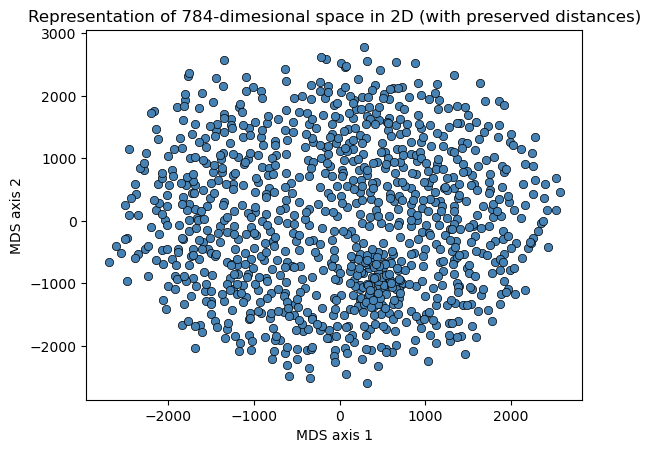

In [31]:
plt.scatter(mds_X[:,0], mds_X[:,1], color='steelblue', edgecolor='k', lw=0.5)
plt.xlabel('MDS axis 1')
plt.ylabel('MDS axis 2')
plt.title('Representation of 784-dimesional space in 2D (with preserved distances)')
plt.show()

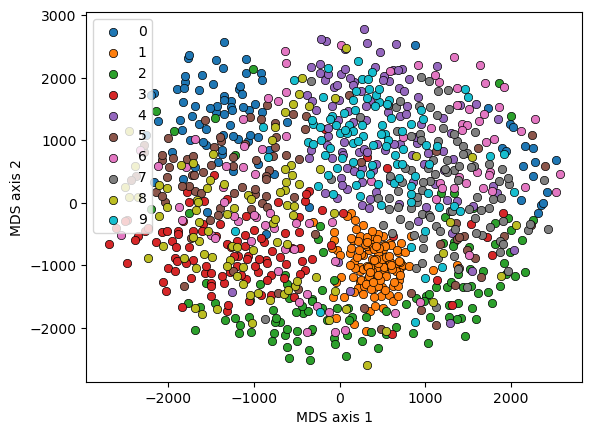

In [33]:
for label in set(Y):
    mask = Y==label
    plt.scatter(mds_X[:,0][mask], mds_X[:,1][mask], label = label, edgecolor='k', lw=0.5)
plt.legend()

plt.xlabel('MDS axis 1')
plt.ylabel('MDS axis 2')
plt.show()

## Exercise 6.1. 
Find the relative coordinates (sketch of the map) of the European cities knowing only pairwise distances between them.

Remember that MDS is a stochastic algorithm and may return different results at each run. Your embeddings may require addtional rotation and reflection to preserve geographical locations. To make your algorithm robust, apply rotations and reflections after each run of MDS. Use the information that Stockholm is directly North of Munich and Athens should be East of Lisbon. Put city labels on your scatter plot.

You should get relative locations similar to these:
![](pics/europe.jpg)

To load data, use the code below:

In [34]:
import pandas as pd
# Pairwise distance between European cities
url = 'https://media.githubusercontent.com/media/neurospin/pystatsml/master/datasets/eurodist.csv'
df = pd.read_csv(url)
df

,city,Athens,Barcelona,Brussels,Calais,Cherbourg,Cologne,Copenhagen,Geneva,Gibraltar,...,Lisbon,Lyons,Madrid,Marseilles,Milan,Munich,Paris,Rome,Stockholm,Vienna
0,Athens,0,3313,2963,3175,3339,2762,3276,2610,4485,...,4532,2753,3949,2865,2282,2179,3000,817,3927,1991
1,Barcelona,3313,0,1318,1326,1294,1498,2218,803,1172,...,1305,645,636,521,1014,1365,1033,1460,2868,1802
2,Brussels,2963,1318,0,204,583,206,966,677,2256,...,2084,690,1558,1011,925,747,285,1511,1616,1175
3,Calais,3175,1326,204,0,460,409,1136,747,2224,...,2052,739,1550,1059,1077,977,280,1662,1786,1381
4,Cherbourg,3339,1294,583,460,0,785,1545,853,2047,...,1827,789,1347,1101,1209,1160,340,1794,2196,1588
5,Cologne,2762,1498,206,409,785,0,760,1662,2436,...,2290,714,1764,1035,911,583,465,1497,1403,937
6,Copenhagen,3276,2218,966,1136,1545,760,0,1418,3196,...,2971,1458,2498,1778,1537,1104,1176,2050,650,1455
7,Geneva,2610,803,677,747,853,1662,1418,0,1975,...,1936,158,1439,425,328,591,513,995,2068,1019
8,Gibraltar,4485,1172,2256,2224,2047,2436,3196,1975,0,...,676,1817,698,1693,2185,2565,1971,2631,3886,2974
9,Hamburg,2977,2018,597,714,1115,460,460,1118,2897,...,2671,1159,2198,1479,1238,805,877,1751,949,1155


In [35]:
# Array with cities:
city = np.array(df["city"])
print(city)

# Squareform distance matrix is here
D = np.array(df.iloc[:, 1:]) 
print(D.shape)

['Athens' 'Barcelona' 'Brussels' 'Calais' 'Cherbourg' 'Cologne'
 'Copenhagen' 'Geneva' 'Gibraltar' 'Hamburg' 'Hook of Holland' 'Lisbon'
 'Lyons' 'Madrid' 'Marseilles' 'Milan' 'Munich' 'Paris' 'Rome' 'Stockholm'
 'Vienna']
(21, 21)


In [ ]:
# Write your code here


## 7. Other dimensionality reduction techniques (non-linear) t-SNE, UMAP

In [36]:
from sklearn.manifold import TSNE

### [t-SNE](https://lvdmaaten.github.io/tsne/) 

In [37]:
%%time

tsne_2d = TSNE(n_components=2).fit_transform(X)

CPU times: total: 4.28 s
Wall time: 7.83 s


### Visualize

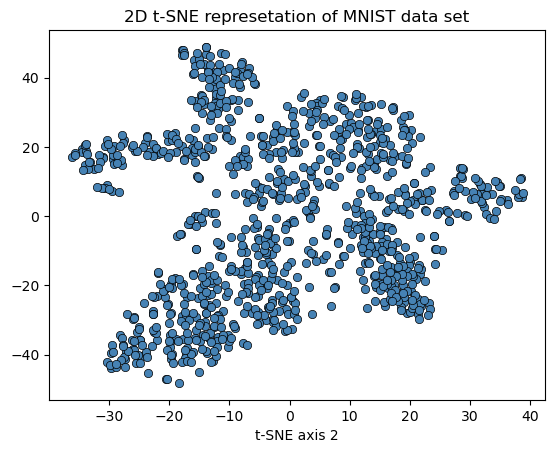

In [38]:
plt.scatter(tsne_2d[:,0], tsne_2d[:,1], edgecolor='k', lw=0.5, color='steelblue')
plt.title('2D t-SNE represetation of MNIST data set')
plt.xlabel('t-SNE axis 1')
plt.xlabel('t-SNE axis 2')
plt.show()

Show with labels:

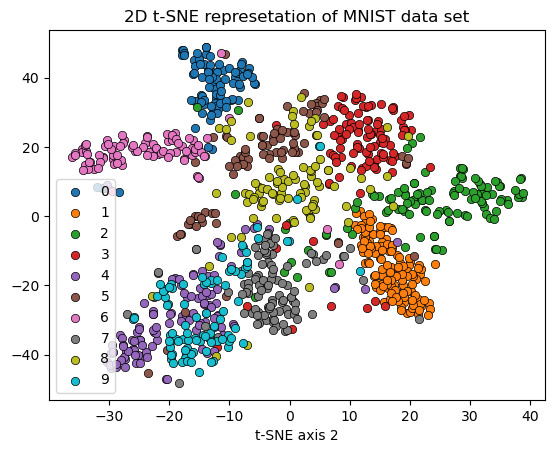

In [39]:
for label in set(Y):
    mask = Y==label
    plt.scatter(tsne_2d[:,0][mask], tsne_2d[:,1][mask], label = label, edgecolor='k', lw=0.5) 
    
plt.title('2D t-SNE represetation of MNIST data set')
plt.xlabel('t-SNE axis 1')
plt.xlabel('t-SNE axis 2')
plt.legend()
plt.show()

### [UMAP](https://github.com/lmcinnes/umap) - is a very fast algorithm. My favorite

In [69]:
# conda install -c conda-forge umap-learn # download in conda venv, first.

In [40]:
%%time

import umap
umap_2d = umap.UMAP(n_components=2).fit_transform(X)

### Visualize

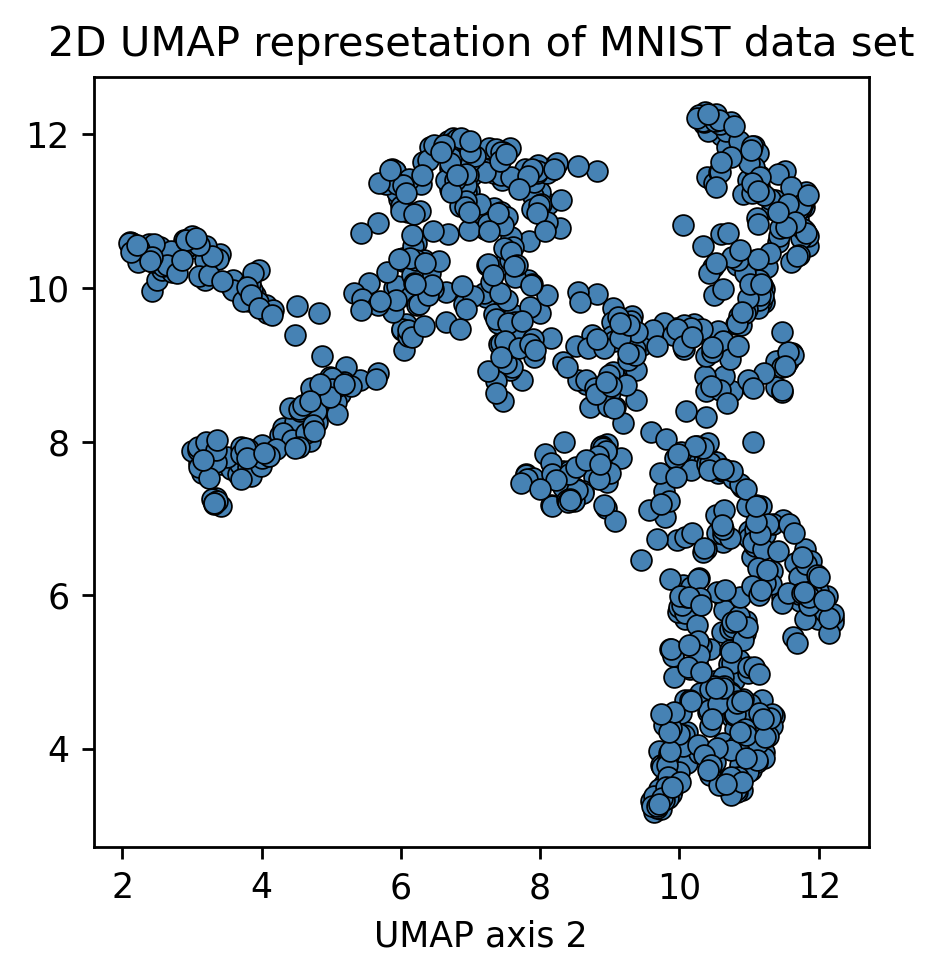

In [43]:
plt.figure(dpi=250, figsize=(4,4))
plt.scatter(umap_2d[:,0], umap_2d[:,1], edgecolor='k', lw=0.5, color='steelblue')
plt.title('2D UMAP represetation of MNIST data set')
plt.xlabel('UMAP axis 1')
plt.xlabel('UMAP axis 2')
plt.show()

Show with labels:

In [ ]:
for label in set(Y):
    mask = Y==label
    plt.scatter(umap_2d[:,0][mask], umap_2d[:,1][mask], marker='o', edgecolor='w', lw=2, label = label) 
plt.title('2D UMAP represetation of MNIST data set')
plt.xlabel('UMAP axis 1')
plt.xlabel('UMAP axis 2')
plt.legend()
plt.show()

## Data exploration: why some of the digits are clustered around other digits?

In [ ]:
mask = (umap_2d[:, 0] < 2) & (Y == 6) & (umap_2d[:, 0] > 1)
plt.imshow(X[mask].reshape(28, 28))